In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X, train_y),(test_X,test_y)=cifar10.load_data()

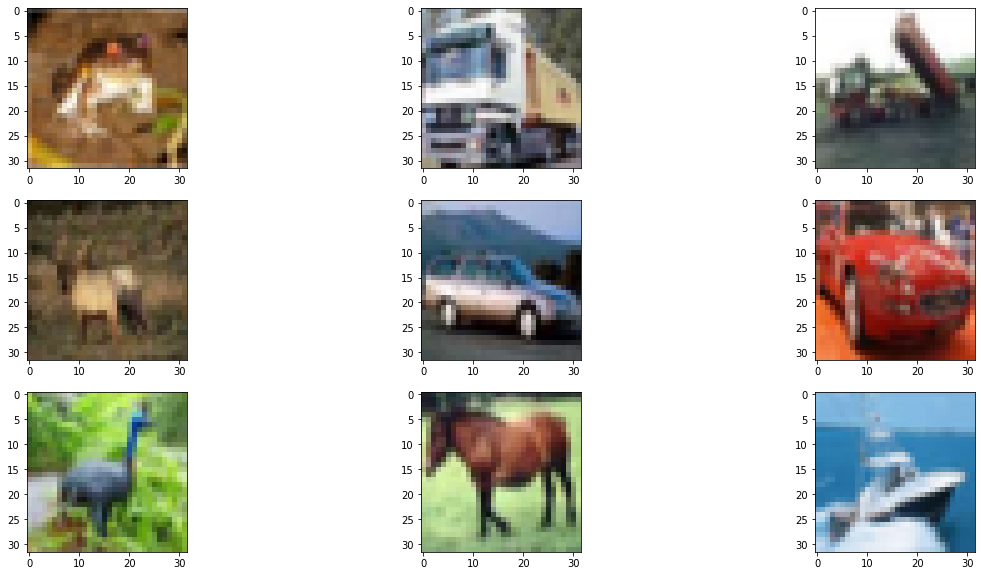

In [2]:
n=9
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [4]:
#converting pixel values to float type then, normalizing datset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X/255.0
test_X = test_X/255.0

In [5]:
#performing the one-hot encoding for target classes
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)

num_classes=test_y.shape[1]

In [6]:
#Creating the sequential model and add the layers
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(32,32,3),
                padding='same',activation='relu',
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
#configure the optimizer and compile the model
sgd=SGD(lr=0.01,momentum=0.9, decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
model.fit(train_X,train_y,validation_data=(test_X,test_y),
         epochs=10,batch_size=64)

Epoch 1/10
782/782 [==============================] - 157s 201ms/step - loss: 1.7301 - accuracy: 0.3741 - val_loss: 1.4371 - val_accuracy: 0.4860
Epoch 2/10
782/782 [==============================] - 153s 195ms/step - loss: 1.3983 - accuracy: 0.4958 - val_loss: 1.2983 - val_accuracy: 0.5342
Epoch 3/10
782/782 [==============================] - 153s 196ms/step - loss: 1.2504 - accuracy: 0.5507 - val_loss: 1.1802 - val_accuracy: 0.5824
Epoch 4/10
782/782 [==============================] - 158s 203ms/step - loss: 1.1494 - accuracy: 0.5877 - val_loss: 1.1256 - val_accuracy: 0.6031
Epoch 5/10
782/782 [==============================] - 165s 211ms/step - loss: 1.0678 - accuracy: 0.6191 - val_loss: 1.0671 - val_accuracy: 0.6222
Epoch 6/10
782/782 [==============================] - 164s 209ms/step - loss: 0.9924 - accuracy: 0.6462 - val_loss: 1.0274 - val_accuracy: 0.6349
Epoch 7/10
782/782 [==============================] - 164s 210ms/step - loss: 0.9281 - accuracy: 0.6734 - val_loss: 1.0216 -

In [11]:
_,acc=model.evaluate(test_X,test_y)
print(acc*100)

313/313 [==============================] - 5s 16ms/step - loss: 0.9524 - accuracy: 0.6734
67.33999848365784


## Can be improve the model by running more epoches ##

In [12]:
model.save('model1_cifar_10epoch.h5')

In [13]:
results={
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

In [22]:
from PIL import Image
import numpy as np
im=Image.open("bird.JPG")
# the input image is required to be in the shape of dataset, ie (32,32,3)

im =im.resize((32,32))
im = np.expand_dims(im,axis=0)
im=np.array(im)
predict=model.predict_classes([im])[0]
print(predict,results[predict])

2 bird


In [28]:
## Classification on GUI ##


import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

#load the trained model to classify the images

from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')

#dictionary to albel 
classes={
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}
#initiate GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classsification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = np.expand_dims(image,axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
                     command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
                        font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
                           (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload= Button(top,text='Upload an image', command=upload_image, padx=10,pady=5)
upload.configure(background='#364156',foreground='white',
                font=('arial',10,'bold'))
upload.pack(side=BOTTOM, pady=50)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading=Label(top,text='Image Classification CIFAR10',pady=20,font=('arial',20,'bold'))

heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()
top.mainloop()

bird
